# 오늘 하루 필기 망함...

In [10]:
import urllib.request as req
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import matplotlib.pylab as plt
from sklearn.datasets import fetch_olivetti_faces

# 랜덤포레스트

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

req.urlretrieve(url, "mushdata.csv")    # 다운로드 폴더에 mushdata.csv로 저장

('mushdata.csv', <http.client.HTTPMessage at 0x26d24357a90>)

In [4]:
mr=pd.read_csv("mushdata.csv", header = None)

In [5]:
mr.shape

(8124, 23)

In [25]:
# 데이터를 숫자로 변환 -> with ord함수(숫자를 아스키 코드로 바꾸는 함수)
label = []
data=[]
for row_index, row in mr.iterrows():
    label.append(row.loc[0])
    row_data = []
    for v in row.loc[1:]:
        row_data.append(ord(v))
    data.append(row_data)
data

[[120,
  115,
  110,
  116,
  112,
  102,
  99,
  110,
  107,
  101,
  101,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  107,
  115,
  117],
 [120,
  115,
  121,
  116,
  97,
  102,
  99,
  98,
  107,
  101,
  99,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  110,
  110,
  103],
 [98,
  115,
  119,
  116,
  108,
  102,
  99,
  98,
  110,
  101,
  99,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  110,
  110,
  109],
 [120,
  121,
  119,
  116,
  112,
  102,
  99,
  110,
  110,
  101,
  101,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  107,
  115,
  117],
 [120,
  115,
  103,
  102,
  110,
  102,
  119,
  98,
  107,
  116,
  101,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  101,
  110,
  97,
  103],
 [120,
  121,
  121,
  116,
  97,
  102,
  99,
  98,
  110,
  101,
  99,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  107,
  110,
  103],
 [98,
  115,
  119,
  116,
  97,
  102,
  99,
  98,
  103,
  101,
  99,
  115,
  115,


In [12]:
data_train, data_test, label_train, label_test = train_test_split(data, label)

In [14]:
# (8124,23)
print(len(data_train))    # 6093
print(len(data_test))     # 2031

6093
2031


## random forest classifier로 분류기 만들기

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [16]:
# 데이터 학습
clf = RandomForestClassifier()    # 랜덤포레스트 객체 생성
clf.fit(data_train, label_train)     # 모델 생성에는 항상 fit 함수를 쓴다

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
predict = clf.predict(data_test)
predict    # 예측 결과

array(['e', 'p', 'e', ..., 'p', 'p', 'e'], dtype='<U1')

In [18]:
# 예측 결과 (predict) 와 실제 결과 (label_test) 비교
# 실제와 예측간 정확도
ac_score = metrics.accuracy_score(label_test, predict)
ac_score

1.0

In [19]:
# 다양한 수치(precision, recall, f1 score)로 정확도 확인
rep = metrics.classification_report(label_test, predict)
print(rep)

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1034
           p       1.00      1.00      1.00       997

   micro avg       1.00      1.00      1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## 라이브러리 안쓰고 train_test_split 구현해보기

In [33]:
label=[]
data=[]
attr_list=[]

In [27]:
# 여기서 잠깐! 빈 딕셔너리는 거짓이다
if {}:
    print("참")
else:
    print("거짓")

거짓


In [34]:
for row_index, row in mr.iterrows():
    label.append(row.ix[0])
    exdata = []
    for col, v in enumerate(row.ix[1:]):    # col에는 인덱스가, v에는 데이터가 할당
        if row_index==0:
            attr = {"dic": {}, "cnt": 0}
            attr_list.append(attr)
        else:
            attr = attr_list[col]
        d = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]    # 버섯의 특징을 표현하는 변수의 종류가 최대 12개라고 전제
        if v in attr["dic"]:
            idx = attr["dic"][v]
        else:
            idx = attr["cnt"]
            attr["dic"][v] = idx
            attr["cnt"] += 1
        d[idx] = 1
        exdata += d    # 리스트 안에 리스트를 넣는 것
    data.append(exdata)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


# 선형대수

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [41]:
iris.data[0, :]

array([5.1, 3.5, 1.4, 0.2])

## 텐서: 같은 크기의 행렬이 여러 개 있는 것

numpy에서는 열의 개수가 1개인 2차원 배열로 벡터를 표현한다

In [43]:
# x 벡터를 numpy 2차원 배열로 표현한 예
x = np.array([
    [5],
    [3],
    [1],
    [4]
])

print(x)

[[5]
 [3]
 [1]
 [4]]


In [44]:
# 또는 numpy에서는 1차원 배열로 벡터를 표현할 수도 있다
x2 = np.array([1, 3, 2, 4])
x2

array([1, 3, 2, 4])

## 이미지를 벡터화 표현

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
samples = [0, 10, 20, 30, 1, 11, 21, 31]    # 이미지 번호

In [48]:
digits    # 숫자 이미지를 벡터화 한 것

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

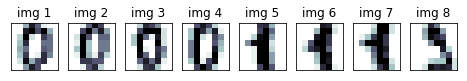

In [63]:
d = []
for i in range(8):
    d.append(digits.images[samples[i]])
plt.figure(figsize=(8,2))
for i in range(8):
    plt.subplot(1, 8, i+1)    # subplot이 plot 칸을 나누는 것. 1행, 8열, 각 박스 위치
    plt.imshow(d[i], cmap=plt.cm.bone_r, interpolation="nearest")
    plt.title("img {}".format(i+1))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

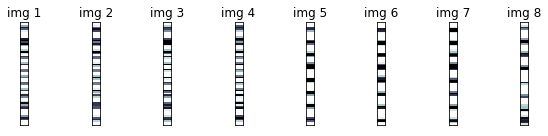

In [70]:
# 위 이미지들을 1차원 벡터로 펼치고 싶다. 2차원 이미지(8,8) -> 1차원 벡터(크기64)
d[0].shape    # (8,8)

v = []
for i in range(8):
    v.append(d[i].reshape(64,1))    # 벡터화
np.shape(v)    # (8, 64, 1)    # 3차원으로 보이지만 사실은 1차원 벡터가 8개 있는 것

plt.figure(figsize=(8,2))
for i in range(8):
    plt.subplot(1, 8, i+1)    # subplot이 plot 칸을 나누는 것. 1행, 8열, 각 박스 위치
    plt.imshow(v[i], aspect=0.2, cmap=plt.cm.bone_r, interpolation="nearest")
    plt.title("img {}".format(i+1))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout(w_pad=3)
plt.show()     # 유사도를 측정하기 위해 벡터를 내적할 때 이렇게 만든 벡터를 사용한다. 즉, 이미지의 유사도를 이런 식으로 판단한다.

## 이미지

In [71]:
from scipy import misc
img_rgb = misc.face()
img_rgb.shape    # (가로, 세로, 채널)

(768, 1024, 3)

Text(0.5, 1.0, 'rbg img4')

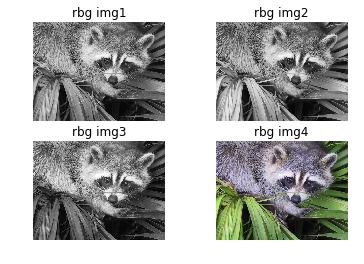

In [74]:
plt.subplot(221)    # 두줄 두칸으로 나눴을 때 왼쪽 상단을 의미
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.gray)    # Red 채널 이미지
plt.axis("off")
plt.title("red img")

plt.subplot(222)    # 두줄 두칸으로 나눴을 때 오른쪽 상단을 의미
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.gray)    # green 채널 이미지
plt.axis("off")
plt.title("green img")

plt.subplot(223)    # 두줄 두칸으로 나눴을 때 왼쪽 하단을 의미
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.gray)    # blue 채널 이미지
plt.axis("off")
plt.title("blue img")

plt.subplot(224)    # 두줄 두칸으로 나눴을 때 오른쪽 하단을 의미
plt.imshow(img_rgb, cmap=plt.cm.gray)
plt.axis("off")
plt.title("rbg img")

## 전치연산(transpose)

In [75]:
x.T

array([[5, 3, 1, 4]])

모든 원소가 0인 N차원 벡터 = 영벡터

모든 원소가 1인 N차원 벡터 = 일벡터

In [76]:
np.zeros((5, 1))    # 5차원 0벡터

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [77]:
np.ones((5, 1))    # 5차원 1벡터

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

## 대각 정방행렬 

정방행렬: 행과 열의 개수가 같다

In [78]:
np.diag([2, 1, 3])

array([[2, 0, 0],
       [0, 1, 0],
       [0, 0, 3]])

항등행렬: 대각 요소값이 1인 대각행렬

In [80]:
np.identity(5)
# 혹은
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 벡터화 행렬의 연산

In [81]:
import matplotlib.pylab as plt

In [84]:
x = np.array([1, 2, 3, 4])
y = np.array([3, 4, 5, 6])
x + y    # 벡터의 덧셈 연산 (요소(element)들끼리 연산)
x - y

array([-2, -2, -2, -2])

In [85]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[3, 4], [5, 6]])
x + y

array([[ 4,  6],
       [ 8, 10]])

## 내적

첫번째벡터 @ 두번째벡터 => 두 벡터 내적

In [88]:
x = np.array([1, 2, 3, 4])
y = np.array([3, 4, 5, 6])

np.dot(x, y)    # 50
# 혹은
x@y    #50

50

가중합과 가중평균

In [ ]:
# 첫번째 벡터@두번째 벡터 => 두 벡터의 내적

## 선형회귀모형 (Linear Regression Model)

선형회귀모형: 독립변수 x에서 종속변수 y를 예측하는 한 방법

독립변수벡터 x와 가중치 벡터 w의 가중합을 y에 대한 예측값(y-hat)을 계산하는 수식이라고 한다.

단점: 비선형 데이터는 잘 예측 못함

그래서 선형모형을 기반으로 한 수정모형을 사용한다.

## 행렬의 곱셈

In [90]:
x = np.array([[1, 2, 3], [4, 5, 6]])
w = np.array([[1, 2], [3, 4], [5, 6]])
c = x @ w
c

array([[22, 28],
       [49, 64]])

행렬의 곱셈에서는 교환법칙이 성립되지 않는다. 즉, AB != BA

In [93]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 9]])
z = np.array([[11, 12], [13, 14]])
print(x@y)
print("--- vs. ---")
print(y@x)

[[19 24]
 [43 54]]
--- vs. ---
[[23 34]
 [34 50]]


In [96]:
print(x@(y+z))
print("-------")
print((x@y)+(x@z))    # 위와 아래가 같다. 결합법칙.

[[ 56  64]
 [128 146]]
-------
[[ 56  64]
 [128 146]]


In [97]:
x+y

array([[ 6,  8],
       [10, 13]])

In [98]:
(x+y).T

array([[ 6, 10],
       [ 8, 13]])

In [99]:
x.T+y.T

array([[ 6, 10],
       [ 8, 13]])

항등행렬의 곱셈

AI=IA=A

In [100]:
A = np.array([[1, 2], [3, 4]])
I = np.eye(2)
A@I

array([[1., 2.],
       [3., 4.]])

## 선형 조합 (이미지)

예: 컴퓨터비전의 모핑

In [102]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
faces

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\user\scikit_learn_data


{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [104]:
np.shape(faces.images[0])

(64, 64)

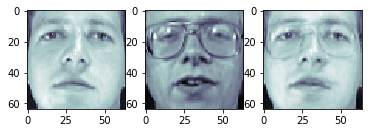

In [114]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)

잔차 = 실제값 - 예측값

## 선형 연립방정식

## 역행렬

어떤 행렬과 역행렬의 곱은 교환법칙이 성립한다.

역행렬에 대한 전치행렬은 전치행렬에 대한 역행렬과 같다

AB의 역행렬은 B의 역행렬을 A의 역행렬에 곱한것과 같다

역행렬 구하는 방법 = 행렬식

In [116]:
X = np.array([[1, 1, 0], [0, 1, 1], [1, 1, 1]])
X

array([[1, 1, 0],
       [0, 1, 1],
       [1, 1, 1]])

In [117]:
X_inv = np.linalg.inv(X)
X_inv

array([[ 0., -1.,  1.],
       [ 1.,  1., -1.],
       [-1.,  0.,  1.]])

In [118]:
X@X_inv

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [119]:
X_inv@X    # 교환법칙 성립

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

역행렬을 이용한 방정식으로 가중치 구하기

Ax = b 일 때

A-1Ax = A-1b

Ix = A-1b

x = A-1b

In [121]:
A = np.array([[1, 1, 0], [0, 1, 1], [1, 1, 1]])
Ainv = np.linalg.inv(A)
A@Ainv

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [122]:
b = np.array([[2], [2], [3]])
b

array([[2],
       [2],
       [3]])

In [123]:
x = Ainv@b
x

array([[1.],
       [1.],
       [1.]])

In [124]:
A @ x - b

array([[0.],
       [0.],
       [0.]])